# **OBJETIVO DO ROTEIRO:** Agrupar um conjunto de dados não rotulados em um número ideal de *K* clusters com base em suas características, de forma que o modelo alcance as métricas de avaliação desejadas.


* Dataset: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [ ]:
# Instale o Kaggle no Colab e configure sua chave API
!pip install kaggle

# Suba seu arquivo kaggle.json
from google.colab import files
files.upload()

# Mova o arquivo para a pasta apropriada
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Baixe o conjunto de dados desejado
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

# Descompacte o arquivo
import zipfile
with zipfile.ZipFile("customer-segmentation-tutorial-in-python.zip", "r") as zip_ref:
    zip_ref.extractall("data")

Saving Mall_Customers.csv to Mall_Customers (1).csv
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 4.26MB/s]


In [ ]:
import pandas as pd

# Carregar o dataset
df = pd.read_csv('data/Mall_Customers.csv')

# Visualizar os dados
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

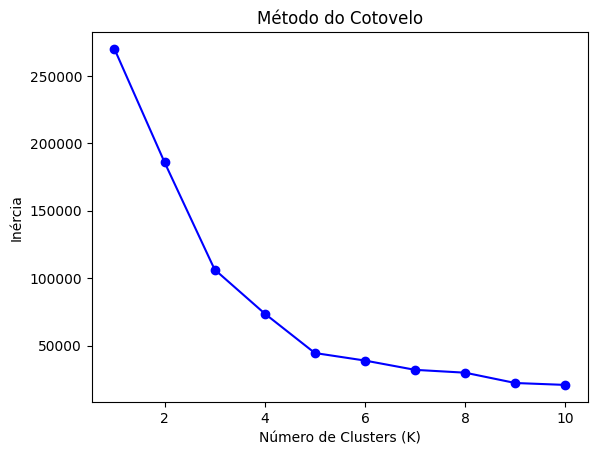

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Definir intervalo para número de clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

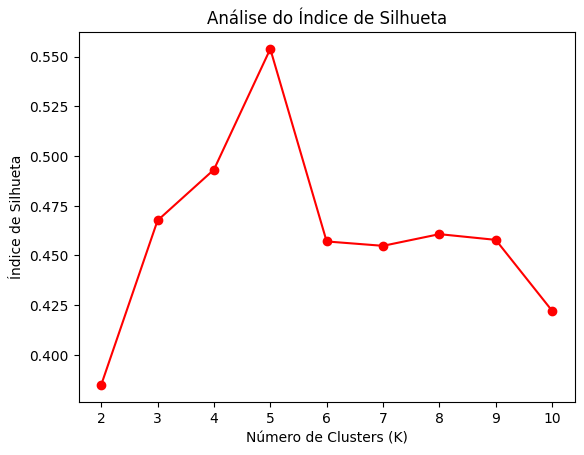

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in K_range[1:]:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plotar o índice de silhueta
plt.plot(K_range[1:], silhouette_scores, 'ro-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Índice de Silhueta')
plt.title('Análise do Índice de Silhueta')
plt.show()

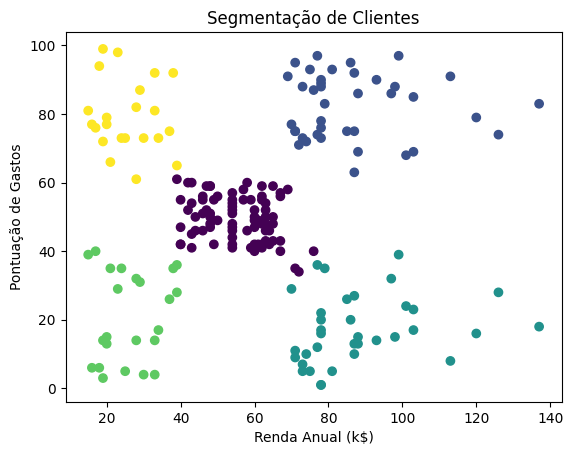

In [ ]:
# Aplicar K-Means com o número ideal de clusters
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
df['Cluster'] = kmeans.labels_

# Visualizar os clusters
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Pontuação de Gastos')
plt.title('Segmentação de Clientes')
plt.show()